Import necessary modules/libraries/packages.

In [1]:
# Import all modules needed for this assignment.
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the CSV file and assign it to a variable `smartcard_replacements`.

In [2]:
# Read the CSV and assign it to variable smartcard_replacements.
smartcard_replacements = pd.read_csv("monthly_smartcard_replacements.csv")

# Task A

## Task A1

In [3]:
# Print the dimensions of the dataset.
smartcard_replacements.shape

(5792, 5)

The above output of `(5792, 5)` signifies the amount of data instances and variables exist in this data set via displaying their rows and columns. 
<br>
In this case, there are 5792 rows and 5 columns.

## Task A2

In [4]:
# Counts all instances of NaN/None/null values and sum them for each column and then outputs them.
smartcard_replacements.isnull().sum()

Month                     0
Transaction               0
Smartcard.Type            0
Action.Reason             0
Number.of.transactions    0
dtype: int64

The left column represents the data set columns' names whereas the right shows the number of NaN/null values in each column.
<br>
Here, there are no null/NaN values in any column in the whole data set.

## Task A3

In [5]:
# Print out the datatypes for each column.
smartcard_replacements.dtypes

Month                     object
Transaction               object
Smartcard.Type            object
Action.Reason             object
Number.of.transactions     int64
dtype: object

On the left, it displays the column name and on the right is shows the data type of that column. In this case `Month`, `Transaction`, `Smartcard.Type`, `Action.Reason` are all objects whereas `Number.of.transactions` is a 64 bit integer value.

## Task A4

In [6]:
# Replaces the Month datatype (object) by converting it to (datatime64[ns]).
smartcard_replacements.Month = pd.to_datetime(smartcard_replacements.Month)

The code above converts the Month columns' datatype from object into datatime64[ns] by utilising the `panda.to_datetime` inbuilt method and assigning the resulting conversion to the `smartcard_replacements.Month` so that the conversion would apply to the original dataset instead of making a copy.

## Task A5

In [7]:
# Prints out a table that describes the statistics of the first numeral column. In this case it's Number.of.transactions.
smartcard_replacements.describe()

,Number.of.transactions
count,5792.000000
mean,303.241540
std,845.056684
min,1.000000
25%,5.000000
50%,18.000000
75%,84.000000
max,9097.000000


The mean is 304 (rounded up) number of transactions. The std is 846 (rounded up) which is really high so it means that the data of the number of transactions is really far from the mean and deviates alot.
<br>
The maximum number of transactions is 9097 which is extremely high compared to the mean or median (18), so it's an outlier.

## Task A6

#### 1.

In [8]:
# Creates an aggregate function that counts the instances of each Smartcard.Type and group them together to a new table
counting_type = {"Smartcard.Type": "count"}
smartcard_types = smartcard_replacements.groupby("Smartcard.Type").agg(counting_type)

# Rename the Smartcard.Type to Count for the second column
smartcard_types.rename(
    columns = {"Smartcard.Type": "Smartcard.Type", "Smartcard.Type": "Count"},
    inplace = True   # Replaces original dataset instead of creating a new one
    )
# Flattens the table into one level.
smartcard_types.reset_index()

,Smartcard.Type,Count
0,Driver Licence Card,1896
1,Industry Authority Card,1218
2,Marine Licence Ind Card,1047
3,Photo Identification Card,1631


There are 4 unique card types - `Driver Licence Card`, `Industry Authority Card`, `Marine Licence Ind Card`, `Photo Identification Card`, which have a count of 1896, 1218, 1047 and 1631 respectively.

#### 2.

In [9]:
# Gets the number of Driver Licence Cards that were replaced.
driver_licence = smartcard_types.loc["Driver Licence Card", "Count"]
# Calculate the total instances of Smartcard.Type in the table.
sum_of_types = smartcard_types["Count"].sum()
# Calculate the percentage of driver licence cards against the total amount of cards replaced.
percentage = (driver_licence / sum_of_types) * 100
print(percentage)

32.73480662983425


The code above will output the percentage of driver licence cards, which is `32.7%` (3 s.f).

## Task A7

#### 1.

In [10]:
# Creates an aggregate function that counts the instances of each Action.Reason and group them together to a new table
counting_reason = {"Action.Reason": "count"}
smartcard_actions = smartcard_replacements.groupby("Action.Reason").agg(counting_reason)

# Rename the Action.Reason to Count for the second column
smartcard_actions.rename(
    columns = {"Action.Reason": "Action.Reason", "Action.Reason": "Count"},
    inplace = True   # Replaces original dataset instead of creating a new one
    )
# Flattens the table into one level.
smartcard_actions.reset_index()

,Action.Reason,Count
0,Change Customer Details,521
1,Condition Change,364
2,Court Order Issued X3 Or X4 Condition,137
3,Da/dgd Smartcard Replacement Fee Exempt,134
4,Damaged,342
5,Defective,88
6,Destroyed,379
7,Disaster Relief,48
8,Expired,133
9,Facial Image Is Not A True Likeness,304


There are 20 unique different reasons as to why their smartcards were replaced as shown above. The instances are also shown above in the right column.

#### 2.

In [11]:
# Filters out all the reasons so only "Lost" is present in the new data frame.
smartcard_lost = smartcard_replacements.loc[smartcard_replacements["Action.Reason"] == "Lost"].copy()

# Creates an aggregate function that sums Number.of.transactions for each month and group them by Month to a new table
sum_lost = {"Number.of.transactions": "sum"}
lost_monthly = smartcard_lost.groupby("Month").agg(sum_lost)

# Filter out all the months where the Number.of.transactions that are less than 100
lost_monthly = lost_monthly[lost_monthly["Number.of.transactions"] > 100]
# Flattens the table
lost_monthly.reset_index()

,Month,Number.of.transactions
0,2011-03-01,152
1,2011-04-01,371
2,2011-05-01,1046
3,2011-06-01,1958
4,2011-07-01,2231
...,...,...
128,2021-11-01,7315
129,2021-12-01,7250
130,2022-01-01,6409
131,2022-02-01,6087


Above shows the months and their respective Number.of.transactions that are more than 100 for all reasons being "Lost". There are 133 rows meaning there are 133 months in which the Number.of.transactions > 100 for all smartcards that are "Lost".

# Task B

## Task B1

#### 1.

In [12]:
# Create a new column named Year and extract the year from the Month column and place it in the new Year column
smartcard_replacements["Year"] = smartcard_replacements["Month"].dt.year

The code above creates a new column for the `smartcard_replacements` dataset and extract the year from the month column to be placed in the new column created.

#### 2.

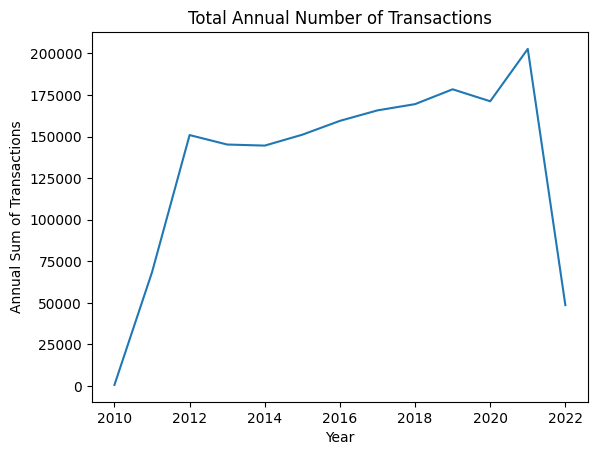

In [13]:
# Creates an aggregate function that calculates the sum of Number.of.transactions in each year and group them together by Year.
sum_transactions = {"Number.of.transactions": "sum"}
annual_transactions = smartcard_replacements.groupby("Year").agg(sum_transactions)

# Flattens the table into one level.
annual_transactions = annual_transactions.reset_index()

# Plots a line graph with the x-axis being the Year and y-axis being the Sum of Transactions.
plt.plot(annual_transactions["Year"], annual_transactions["Number.of.transactions"])
plt.xlabel("Year")
plt.ylabel("Annual Sum of Transactions")
plt.title("Total Annual Number of Transactions")
plt.show()

Above is a line graph with x-axis being the "Year" and y-axis being the "Sum of Transactions". The title of the line graph is the "Total Annual Number of Transactions".

#### 3.

Initially from the year 2010 until the year 2012, there was a continuous upward trend in which the annual sum of transactions increased until 150,000 yearly. 
<br>
Then it reached its peak in 2012 before plateauing until 2014, in which it then gradually increased until 2019, which had 175,000 transactions.
<br>
In 2019, there was a minute drop in annual trasactions before spiking up suddenly in 2020 to 200,000 total transactions.
<br>
Then in 2021, there was a massive and significant drop in annual number of transactions from around 200,000 to around 50,000 in 2022
<br>
<br>
The increase in transactions from 2010 to 2012 was because the popularity of using smartcards grew as technology advances, hence more people replacing their smartcards for one reason or another. Then in 2020 - 2022, the total annual transactions plummeted due to the pandemic. As lockdown and quarantine was enforced globally, usage of smartcards drastically decreased, leading to a downward trend as people won't replace it due to them using it less.

## Task B2

#### 1.

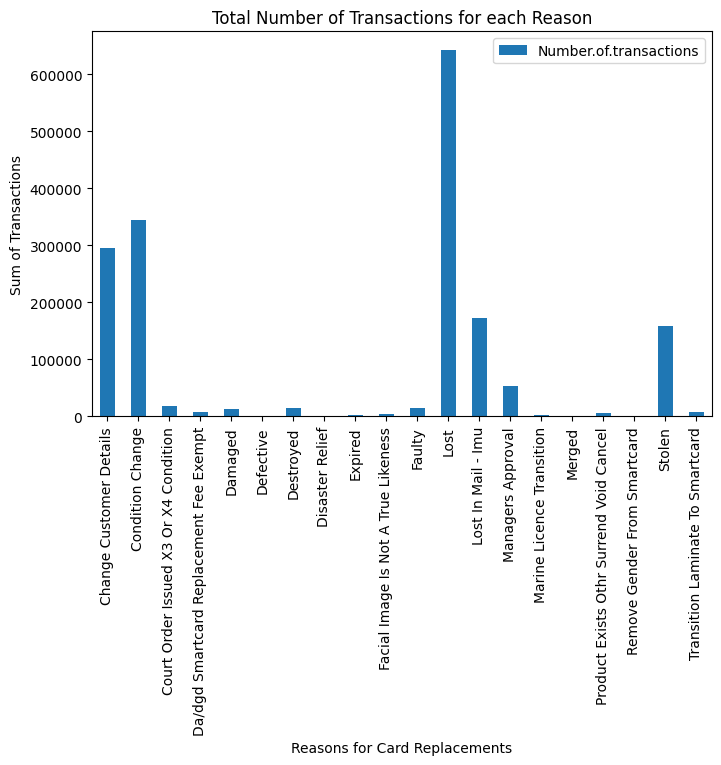

In [14]:
# Creates an aggregate function that calculates the sum of transactions group by their reasons to a new table.
sum_reason = {"Number.of.transactions": "sum"}
transactions_reason = smartcard_replacements.groupby("Action.Reason").agg(sum_reason)

# Flattens the table into one level.
transactions_reason_flat = transactions_reason.reset_index()

# Plots a bar graph with the x-axis being the ACtion.Reason and y-axis being the Sum of Transactions.
bar_chart = transactions_reason_flat.plot.bar(figsize=(8, 5))
bar_chart.set_xticklabels(transactions_reason_flat["Action.Reason"])
plt.xlabel("Reasons for Card Replacements")
plt.ylabel("Sum of Transactions")
plt.title("Total Number of Transactions for each Reason")
plt.show()

A bar chart is plotted with x-axis being the reasons for their card replacements and the y-axis is the total number of transactions for that said reasons.

#### 2.

In [15]:
# Gets the top 3 largest of the Number.of.transactions column
top3largest = transactions_reason.nlargest(n = 3, columns = ["Number.of.transactions"])
# Flatten the top 3 largest data frame
top3largest.reset_index()

,Action.Reason,Number.of.transactions
0,Lost,642749
1,Condition Change,344905
2,Change Customer Details,294435


`Lost`, `Condition Change` and `Change Customer Details` are the top 3 largest reasons for replacement being 642749, 344905 and 294435 respectively.

#### 3.

In [16]:
# Only gets the row that fits this condition: Number.of.transactions > 1000 and Number.of.transactions < 2000.
in_range = transactions_reason[(transactions_reason["Number.of.transactions"] > 1000) & (transactions_reason["Number.of.transactions"] < 2000)]
# Flattens the table.
in_range.reset_index()

,Action.Reason,Number.of.transactions
0,Marine Licence Transition,1822


Only `Marine Licence Transition` is between 1000 and 2000 Number.of.transactions at 1822.

## Task B3

#### 1.

In [17]:
# Creates an aggregate function that sums the annual transactions and group by reasons and year to a new table.
sum_year = {"Number.of.transactions": "sum"}
annual_transactions_for_reasons = smartcard_replacements.groupby(["Year", "Action.Reason"]).agg(sum_year)

# Rename the Number.of.transactions to Annual Sum of Transactions.
annual_transactions_for_reasons.rename(
    columns = {"Number.of.transactions": "Annual Sum of Transactions"},
    inplace = True   # Replaces original dataset instead of creating a new one.
    )

# Flattens the table into one level.
annual_transactions_for_reasons.reset_index()

,Year,Action.Reason,Annual Sum of Transactions
0,2010,Change Customer Details,84
1,2010,Condition Change,39
2,2010,Court Order Issued X3 Or X4 Condition,7
3,2010,Da/dgd Smartcard Replacement Fee Exempt,3
4,2010,Damaged,9
...,...,...,...
231,2022,Merged,32
232,2022,Product Exists Othr Surrend Void Cancel,41
233,2022,Remove Gender From Smartcard,4
234,2022,Stolen,4302


Above shows the annual total number of transactions for each reason from the year 2010 - 2022.

#### 2.

In [18]:
# Gets the table from the previous task's code
reason_transactions = annual_transactions_for_reasons["Annual Sum of Transactions"]
reason_transactions = reason_transactions.reset_index()

# Group by the reasons and count the number of years where annual transactions exceed 10000
reason_transactions = reason_transactions.groupby("Action.Reason").apply(lambda x: (x > 10000).sum())
# Delete the Year column
del reason_transactions["Year"]

# Rename the Annual SUm of Years to Number of Years where Annual Transactions Exceeds 10000 for the second column
reason_transactions.rename(
    columns = {"Annual Sum of Transactions": "Number of Years where Annual Transactions Exceeds 10000"},
    inplace = True   # Replaces original dataset instead of creating a new one
    )

# Flatten the table
reason_transactions.reset_index()

,Action.Reason,Number of Years where Annual Transactions Exceeds 10000
0,Change Customer Details,11
1,Condition Change,11
2,Court Order Issued X3 Or X4 Condition,0
3,Da/dgd Smartcard Replacement Fee Exempt,0
4,Damaged,0
5,Defective,0
6,Destroyed,0
7,Disaster Relief,0
8,Expired,0
9,Facial Image Is Not A True Likeness,0


Above shows the number of years where the annual transactions for each reason exceeds 10,000. Only 5 exceeds 10,000 while the others are below it hence 0 years for reasons where annual transactions are below 10,000.

#### 3.

In [19]:
# Filters out and gets all the rows in which the reasons have 0 years exceeding 10000 annual transactions
is_zero = reason_transactions[reason_transactions["Number of Years where Annual Transactions Exceeds 10000"] == 0]

# Drop/remove all those rows that are 0 from the original reason_transactions table
reason_transactions_10000 = reason_transactions.drop(is_zero.index)

# Flatten the table
reason_transactions_10000.reset_index()

,Action.Reason,Number of Years where Annual Transactions Exceeds 10000
0,Change Customer Details,11
1,Condition Change,11
2,Lost,12
3,Lost In Mail - Imu,8
4,Stolen,10


The data frame above shows that only 5 reasons in which the Annual Transactions exceeds 10,000 for at least one year. The reasons are `Change Customer Details`, `Condition Change`, `Lost`, `Lost In Mail - Imu`, `Stolen` and their number of years where annual transactions exceeds 10,000 are 11 years, 11 years, 12 years, 8 years and 10 years respectively.

#### 4.

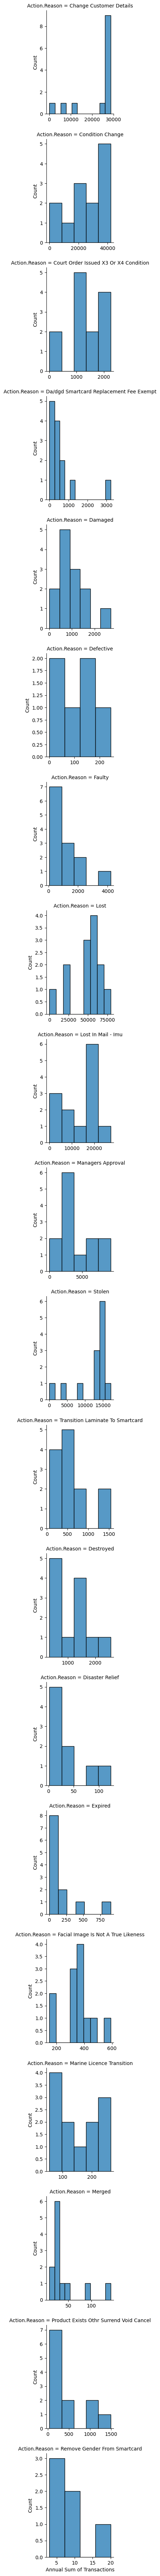

In [20]:
# Flattens the graph.
annual_transaction_histogram = annual_transactions_for_reasons.reset_index()

# Create a FacetGrid with 20 different Action.Reason
multiple_histogram = sns.FacetGrid(annual_transaction_histogram, col = "Action.Reason", col_wrap = 1, sharex = False, sharey = False)
# Map each Action.Reason into a histogram with Annual Sum of Transactions being their x-axis
multiple_histogram.map(sns.histplot, "Annual Sum of Transactions")

# Adjust the space on the top of each histogram to be slightly bigger
multiple_histogram.figure.subplots_adjust(top = 1.2)

Above are every 20 Action.Reason plotted as a histogram with their Annual Sum of Tranascations as it's x-axis and the count/frequency as it's y-axis.

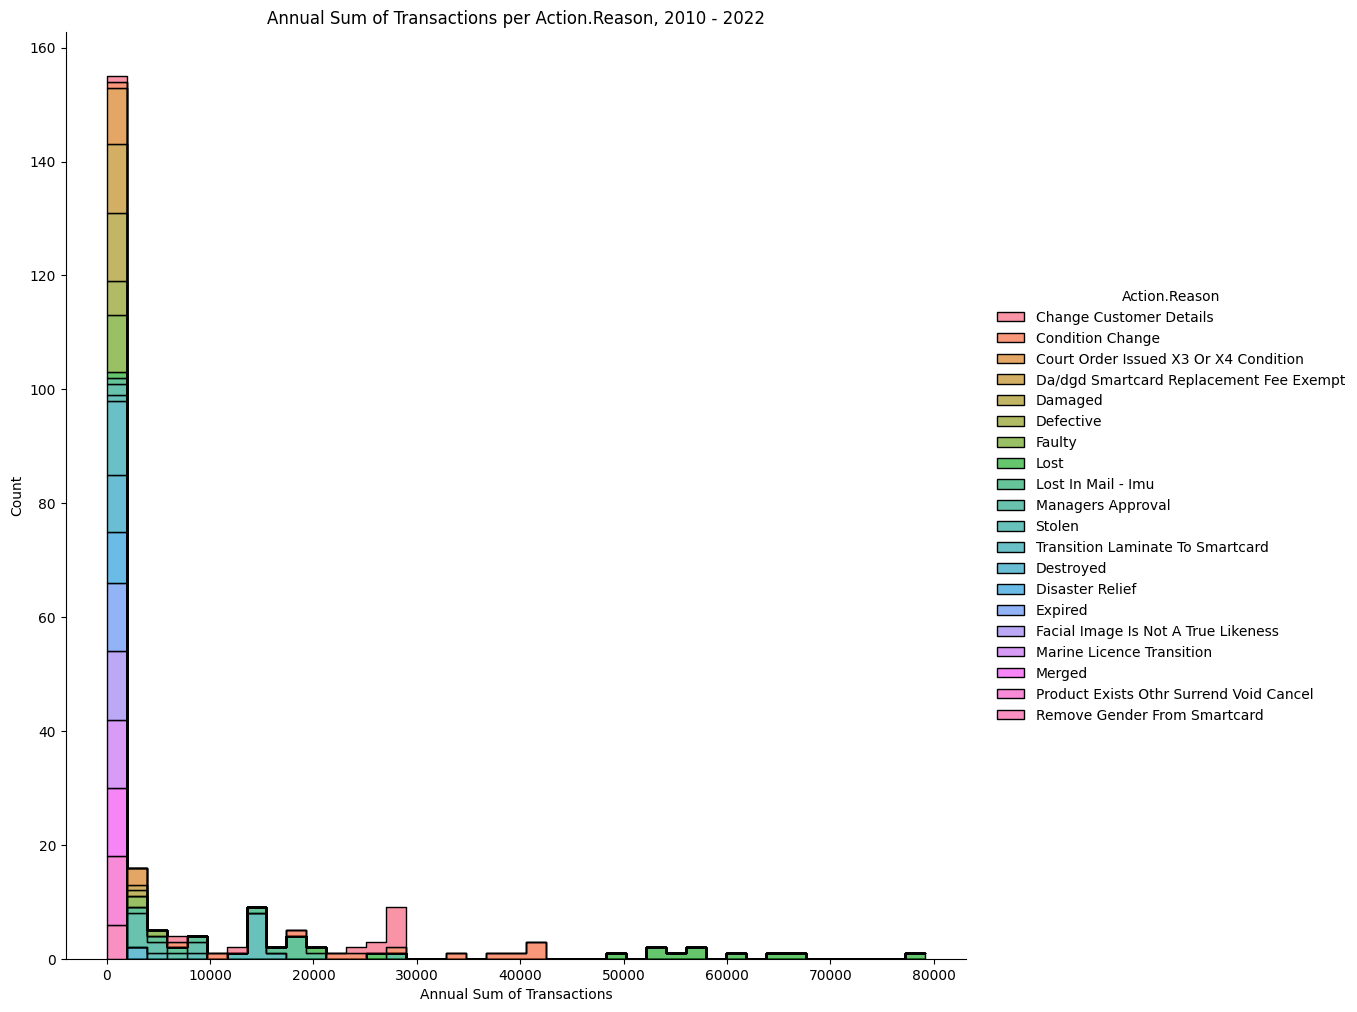

In [21]:
# Create a combined histogram plot with x-axis being Annual Sum of Tranasactions and stack multiple histogram on each other.
combined_histogram = sns.displot(annual_transaction_histogram, x = "Annual Sum of Transactions", hue = "Action.Reason", multiple = "stack", element = "step", height = 10)

# Set the title to be this.
combined_histogram.set(title = "Annual Sum of Transactions per Action.Reason, 2010 - 2022")
combined_histogram

Above combines all the Action.Reason into one plotted histogram with a colour-coded key to signify different Action.Reason.

#### 5.

The histogram aboved with stack Action.Reason is a right skewed distribution graph as there is a higher frequency on the left side of the graph compared to the right.
<br>
One reason as to why the histogram is right skewed is because it is uncommon for customers to replace their smartcards often hence the mode being on the left side of the graph. Some of the reasons in the first bin are actions that changed their smartcard details like "Facial Image is Not A True Likeness" and "Remove Gender From Smartcard". Once these conditions are satisfied in their new smartcard, customers will not see a reason to replace it again, hence the low transactions for these reasons.
<br>
In addition, reasons such as "Lost" and "Condition Change" have a significantly larger Annual Sum of Transactions compared to the other reasons but a lower frequency rate. This could mean that although a lot of customers have lost their smartcards, it doesn't happen frequently every year.